# Importing Datasets

In [1]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/Passport Detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
!ls

'Passport Detection'  'Passport Detection.zip'	 sample_data


# importing the Dependencies

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf

In [4]:
Passport = os.listdir('/content/Passport Detection/passport(289)')
print(Passport[0:5])
print(Passport[-5:])

['cb23c67c9ca8418b824d5adf6490f8c1_1102_0_png.rf.b27f40fab171f4c960581e60943fa861.jpg', '96232f8488494e09bb6e353987d2a7fb_1036_0_png.rf.f65a9916e8528f4c30aac5b330dcee33.jpg', 'eaee95dc7ff646f6b3156946fffe2494_img3_jpeg_jpg.rf.96cc322f04512249431849469df1e02a.jpg', 'e9ec4818a79a4bbbae90ffaa87faae85_img2_jpeg_jpg.rf.6d8842a129ad656b30d7175cc591e56b.jpg', 'ae9a099ad63548809a245a7941232ce1_img23_jpeg_jpg.rf.e76057359991777469b23d46d7852e90.jpg']
['1100_0_png.rf.347beebbe546ab816fd5c9fdb2836d24.jpg', '468712dcbedf4c4ab9ec3906695d3c51_1005_0_png.rf.1a61e1e9935a583994bd749c2641530c.jpg', '1048_0_png.rf.f48d066128ec6b15339690349c0edf75.jpg', 'de2ea8220c5e4e319145fd7ce346b8a3_1088_0_png.rf.d06dfc2b42b4bf483409ccbdbd3e0eca.jpg', '1122_0_png.rf.8b2ef2da1cc5c0af31ffeaad58e0e79f.jpg']


In [5]:
non_Passport = os.listdir('/content/Passport Detection/non passport(334)')
print(non_Passport[0:5])
print(non_Passport[-5:])

['62.jpg', '49.jpg', '21.jpg', '271.jpg', '247.jpg']
['160.jpg', '296.jpg', '116.jpg', '200.jpg', '203.jpg']


In [6]:
print("No of Passport images : ",len(Passport))
print("No of non_Passport images : ",len(non_Passport))

No of Passport images :  289
No of non_Passport images :  334


# Creating the labels

In [7]:
Passport_labels = [1]*289
non_Passport_labels = [0]*334

In [8]:
print(Passport_labels[0:5])
print(non_Passport_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
print(len(Passport_labels))
print(len(non_Passport_labels))

289
334


In [10]:
labels = Passport_labels + non_Passport_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

623
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying images

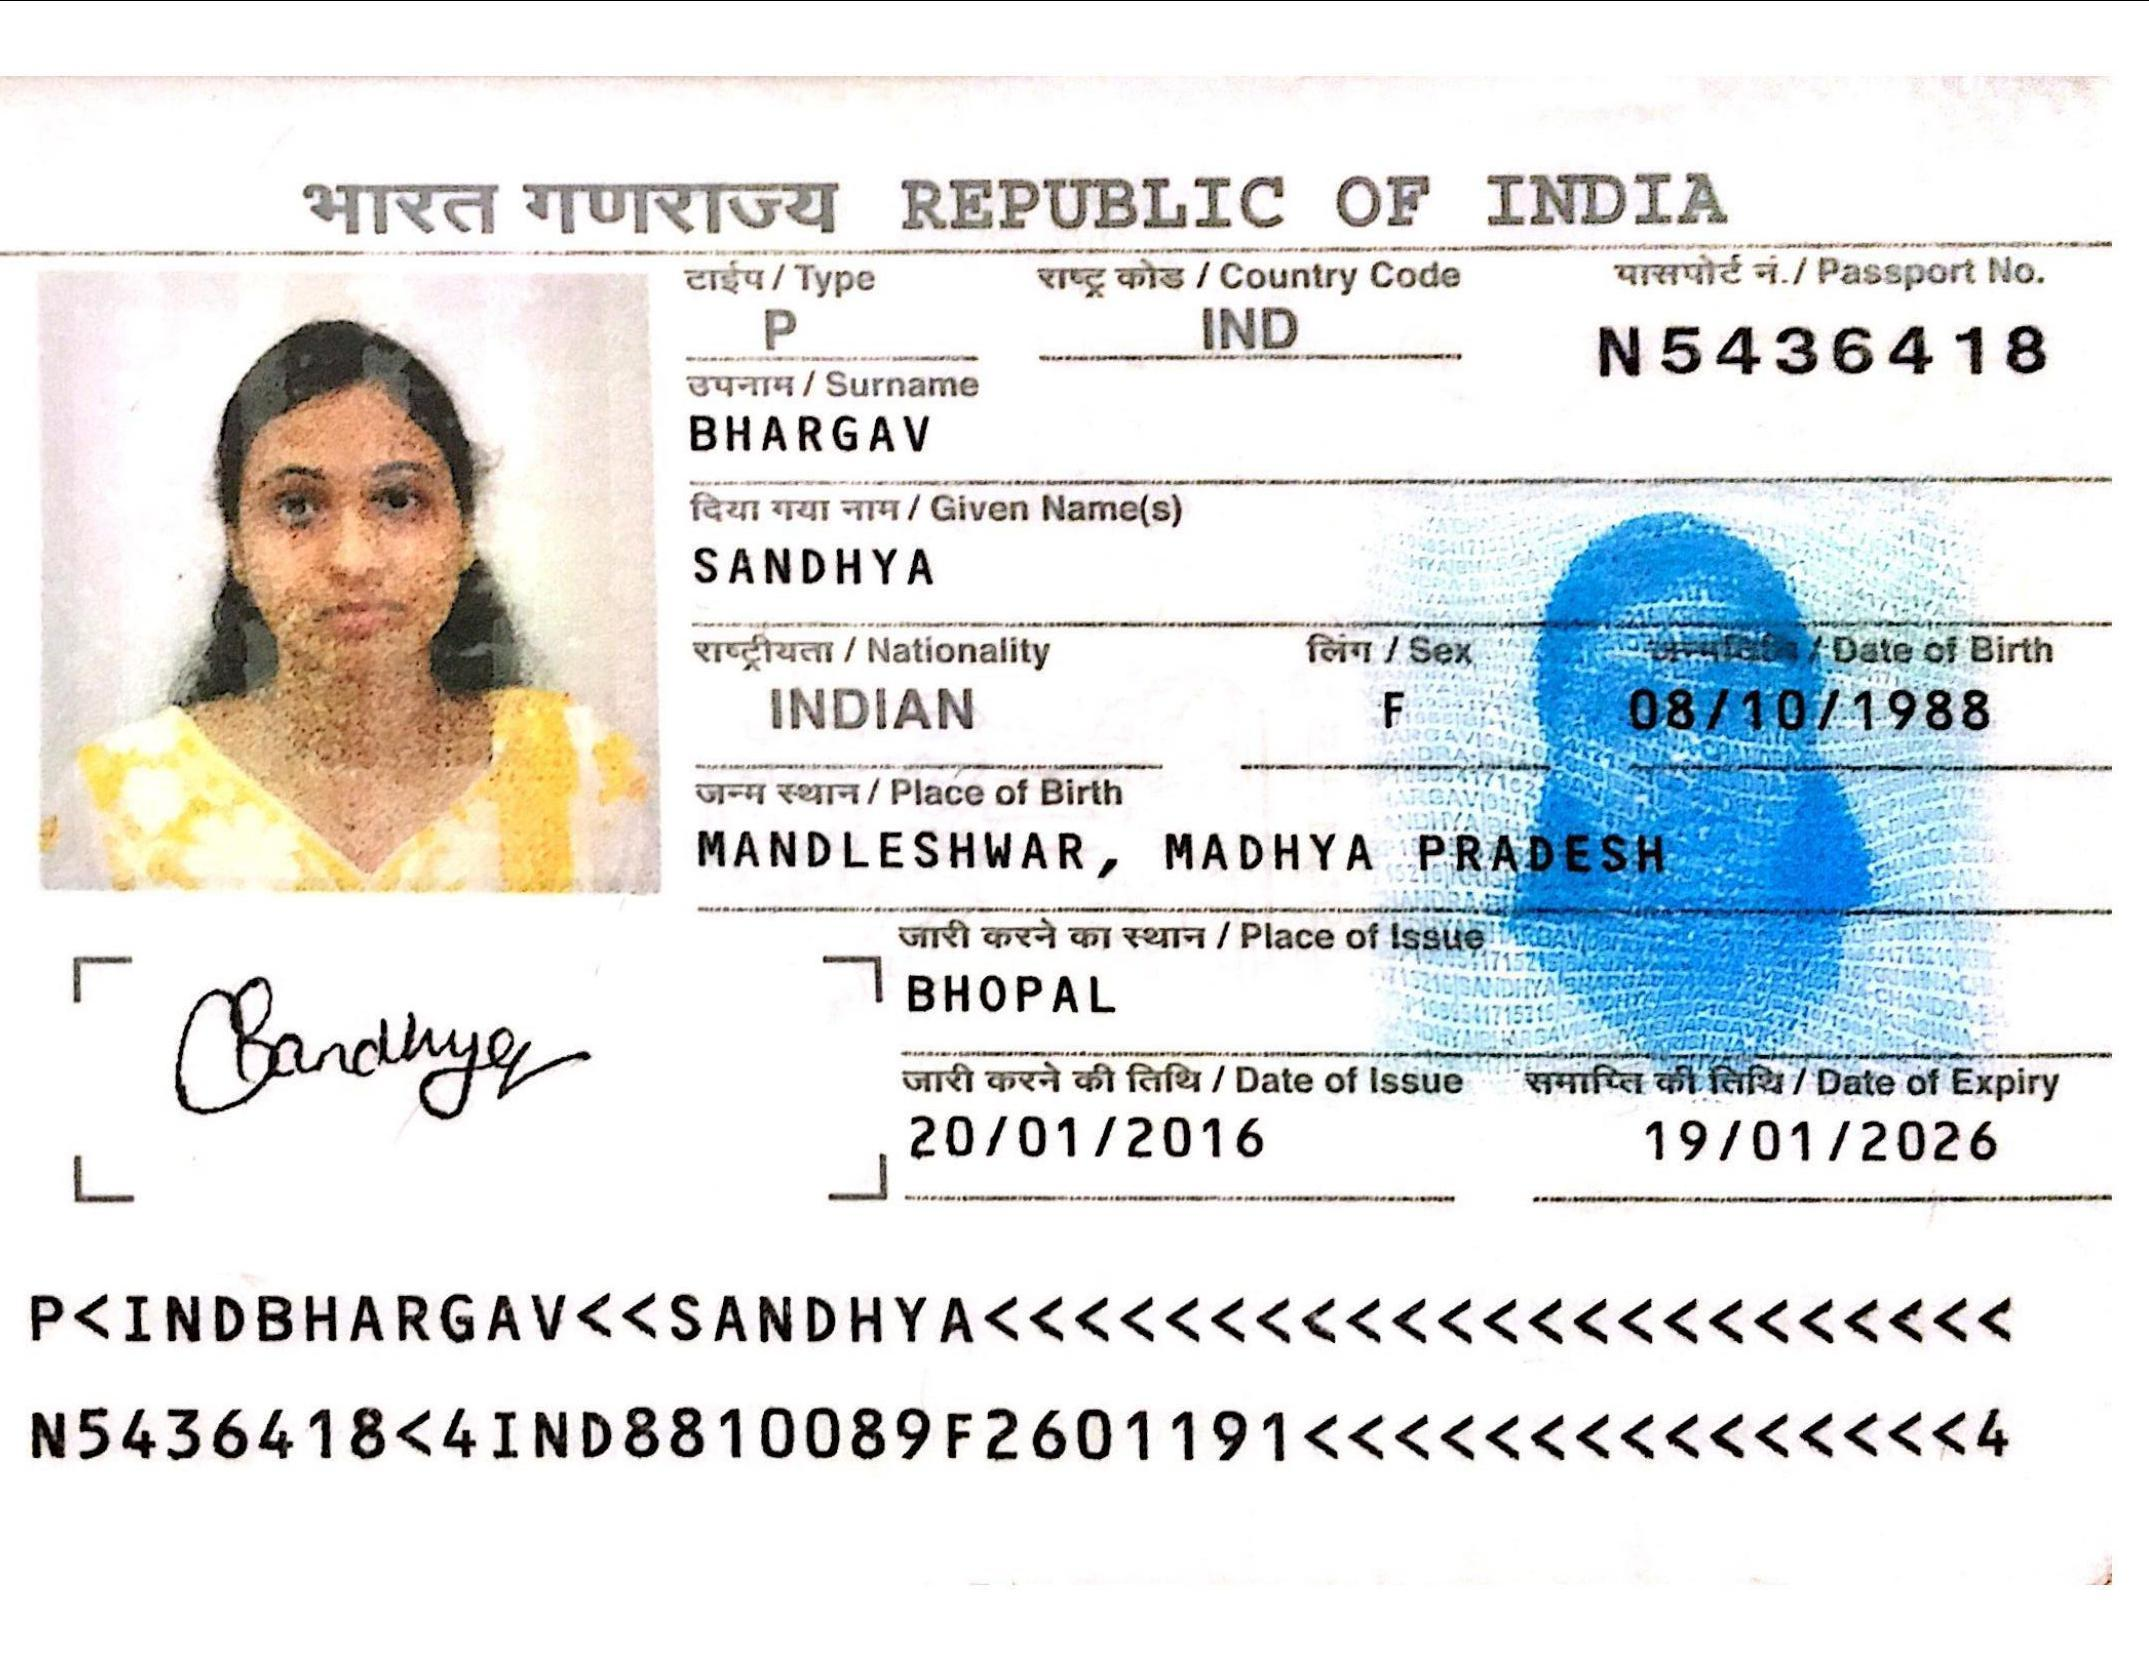

In [11]:
# displaying the passport image
img = cv2.imread('/content/Passport Detection/passport(289)/05499ee907c64078aeb67511c00afb9f_1085_0_png.rf.ed24095f78517fcc6e33b905d205b78c.jpg')
cv2_imshow(img)

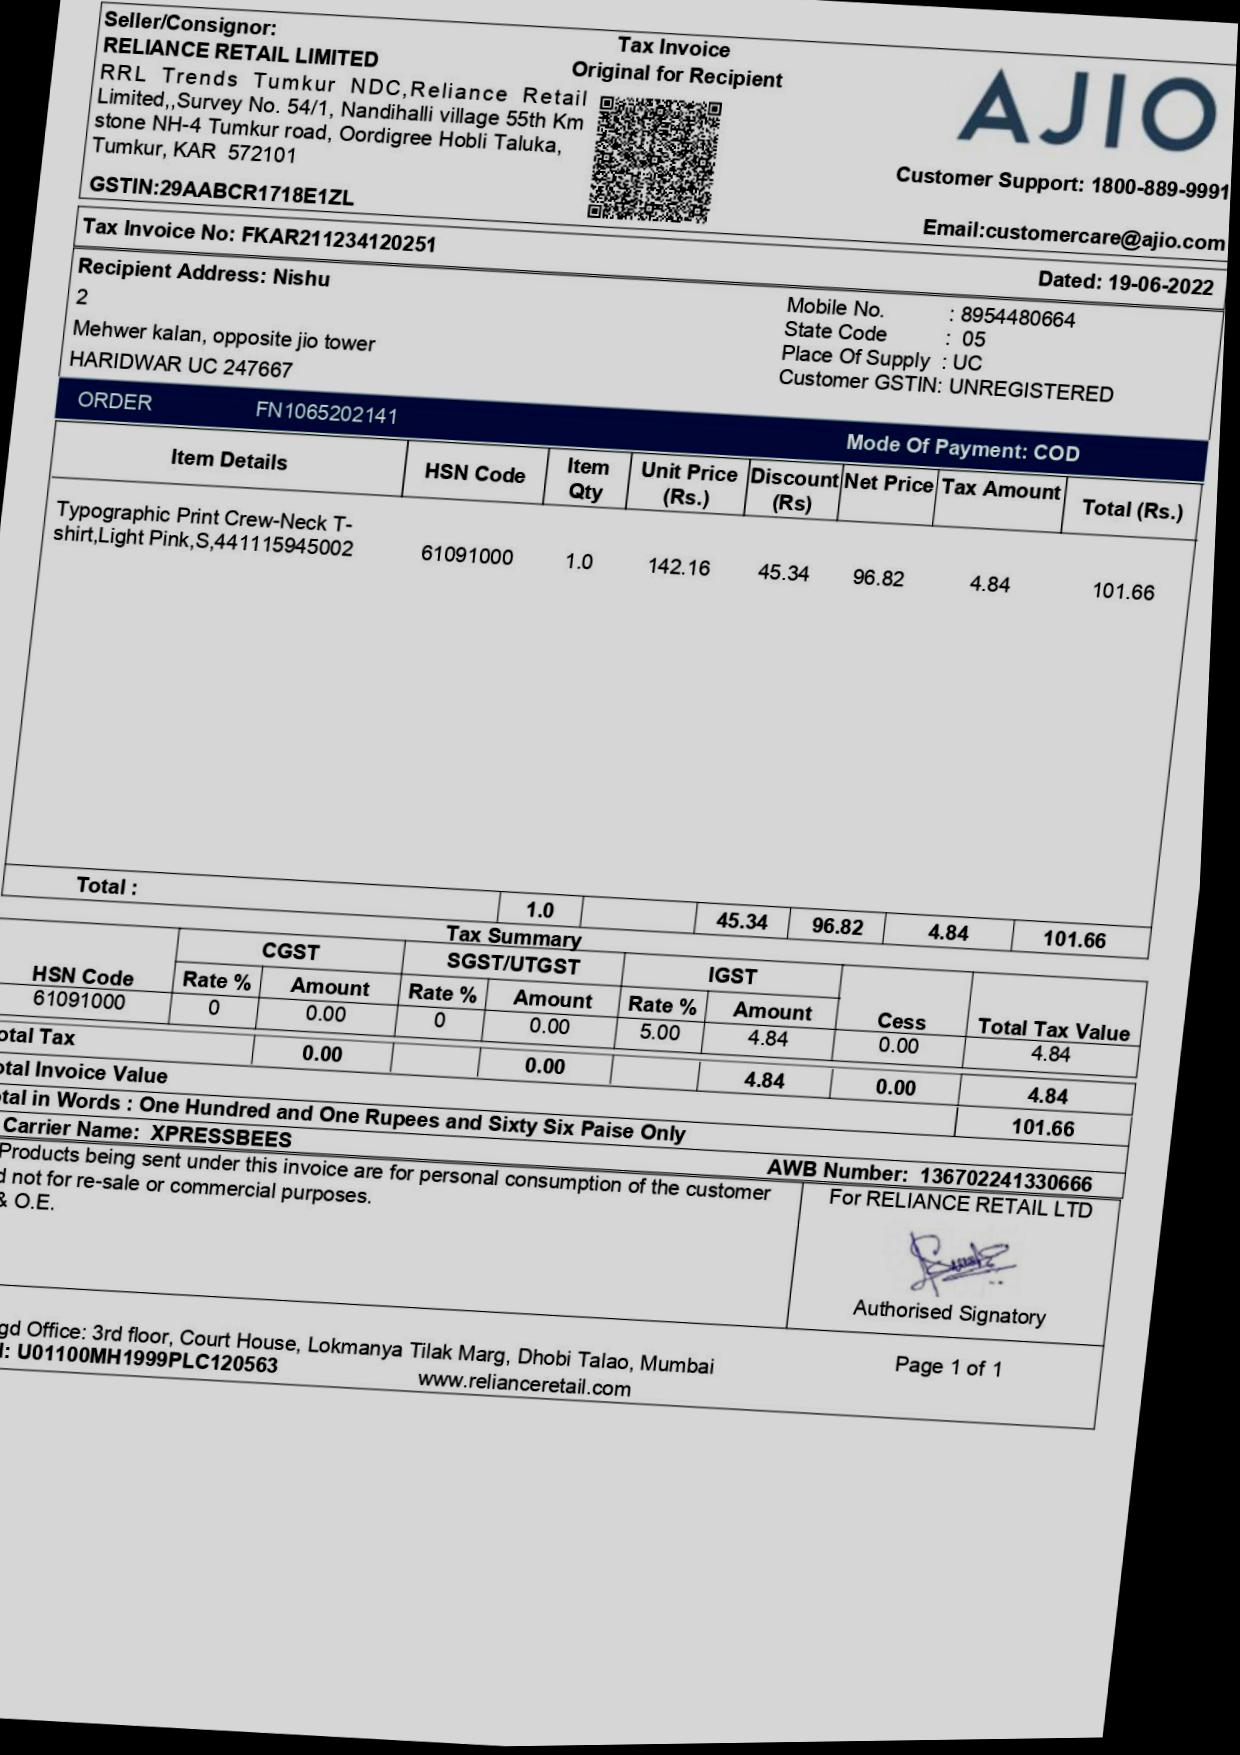

In [12]:
# displaying the non pan card image
img = cv2.imread('/content/Passport Detection/non passport(334)/106.jpg')
cv2_imshow(img)

# Image Processing

In [15]:
# convert images to numpy arrays

data = []

Passport_path = '/content/Passport Detection/passport(289)'
for img_file in Passport:
  image = Image.open(os.path.join(Passport_path, img_file))
  image = image.resize((256, 256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

non_Passport_path = '/content/Passport Detection/non passport(334)'
for img_file in non_Passport:
  image = Image.open(os.path.join(non_Passport_path, img_file))
  image = image.resize((256, 256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [16]:
type(data)

list

In [17]:
print(len(data))

623


array([[[  6,   6,   6],
        [209, 209, 209],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  6,   6,   6],
        [210, 210, 210],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  7,   7,   7],
        [210, 210, 210],
        [255, 255, 255],
        ...,
        [202, 202, 202],
        [199, 199, 199],
        [197, 197, 197]],

       ...,

       [[138, 138, 138],
        [200, 200, 200],
        [200, 200, 200],
        ...,
        [255, 255, 255],
        [210, 210, 210],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [210, 210, 210],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [209, 209, 209],
        [  6,   6,   6]]], dtype=uint8)
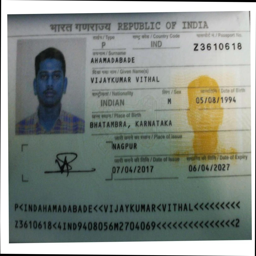

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(256, 256, 3)

In [21]:
# converting the image list and label list to numpy array

X = np.array(data)
y = np.array(labels)

In [22]:
print(X.shape)
print(y.shape)

(623, 256, 256, 3)
(623,)


# Splitting the data into Training and Test data

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
print (X.shape , X_train.shape , X_test.shape)
print (y.shape , y_train.shape , y_test.shape)

(623, 256, 256, 3) (498, 256, 256, 3) (125, 256, 256, 3)
(623,) (498,) (125,)


In [25]:
# scaling the data
X_train = X_train/255
X_test  = X_test/255

In [26]:
print(X_train[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


# Building the Convolutional Neural Network

In [27]:
# initializing the cnn
cnn = tf.keras.models.Sequential()

In [28]:
# convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256,256,3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
#Adding second convolutional layer and pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
#Flattenning
cnn.add(tf.keras.layers.Flatten())

In [32]:
#Full connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [33]:
#output layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

# Training the Convolutional Neural Network

In [34]:
#compiling the cnn
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
#training the neural network on training set and validating on validation split
history = cnn.fit(X_train,y_train,validation_split=0.1,epochs=25)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5094 - loss: 1.8587 - val_accuracy: 0.8200 - val_loss: 0.5758
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8771 - loss: 0.4199 - val_accuracy: 0.7800 - val_loss: 0.3844
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9635 - loss: 0.1167 - val_accuracy: 0.9200 - val_loss: 0.2103
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9107 - loss: 0.2243 - val_accuracy: 0.8200 - val_loss: 0.3557
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9676 - loss: 0.1312 - val_accuracy: 0.9600 - val_loss: 0.1163
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9954 - loss: 0.0244 - val_accuracy: 0.9800 - val_loss: 0.0875
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9800 - val_loss: 0.1146
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9600 - val_loss:

# Model Evaluation

In [36]:
loss , accuracy = cnn.evaluate(X_test,y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.9915 - loss: 0.0740
Loss :  0.11230017989873886
Accuracy :  0.984000027179718


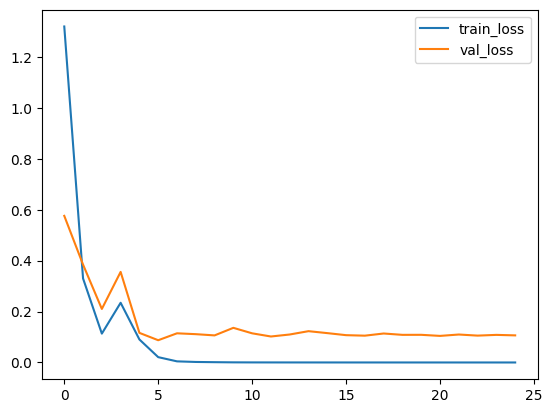

In [37]:
h = history

#plot loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

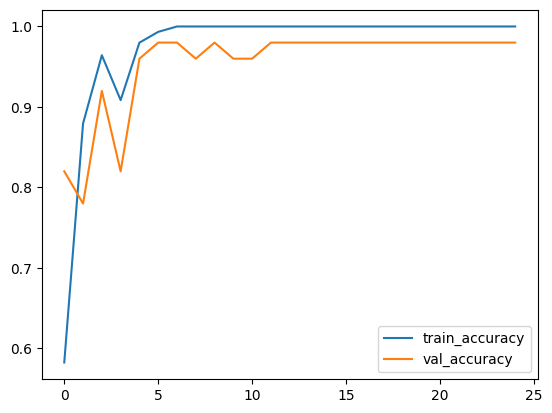

In [38]:
#plot accuracy value
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


# Building a predictive system

path of the image to be predicted :/content/Passport Detection/passport(289)/0ce1e847dd00428aa57067e42922a825_img15_jpeg_jpg.rf.2425b1542d2d97aa174d0dfba6280629.jpg


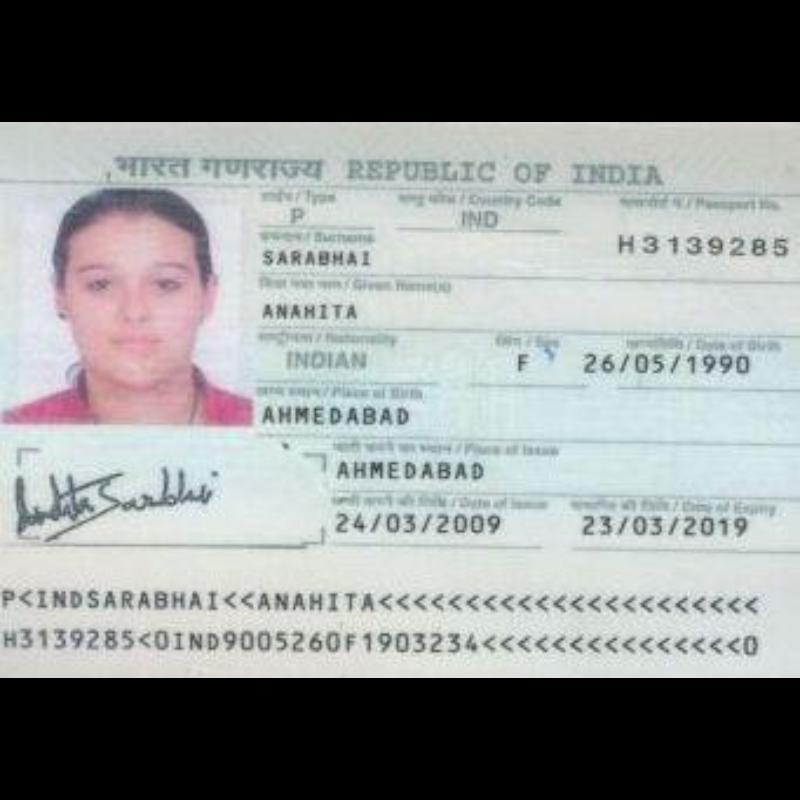

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[[2.3570394e-08 9.9631983e-01]]
1
This is a  Passport


In [39]:

input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,256,256,3])

input_prediction = cnn.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('This is a  Passport')
else:
  print('This is not a Passport')

path of the image to be predicted :/content/Passport Detection/non passport(334)/110.jpg


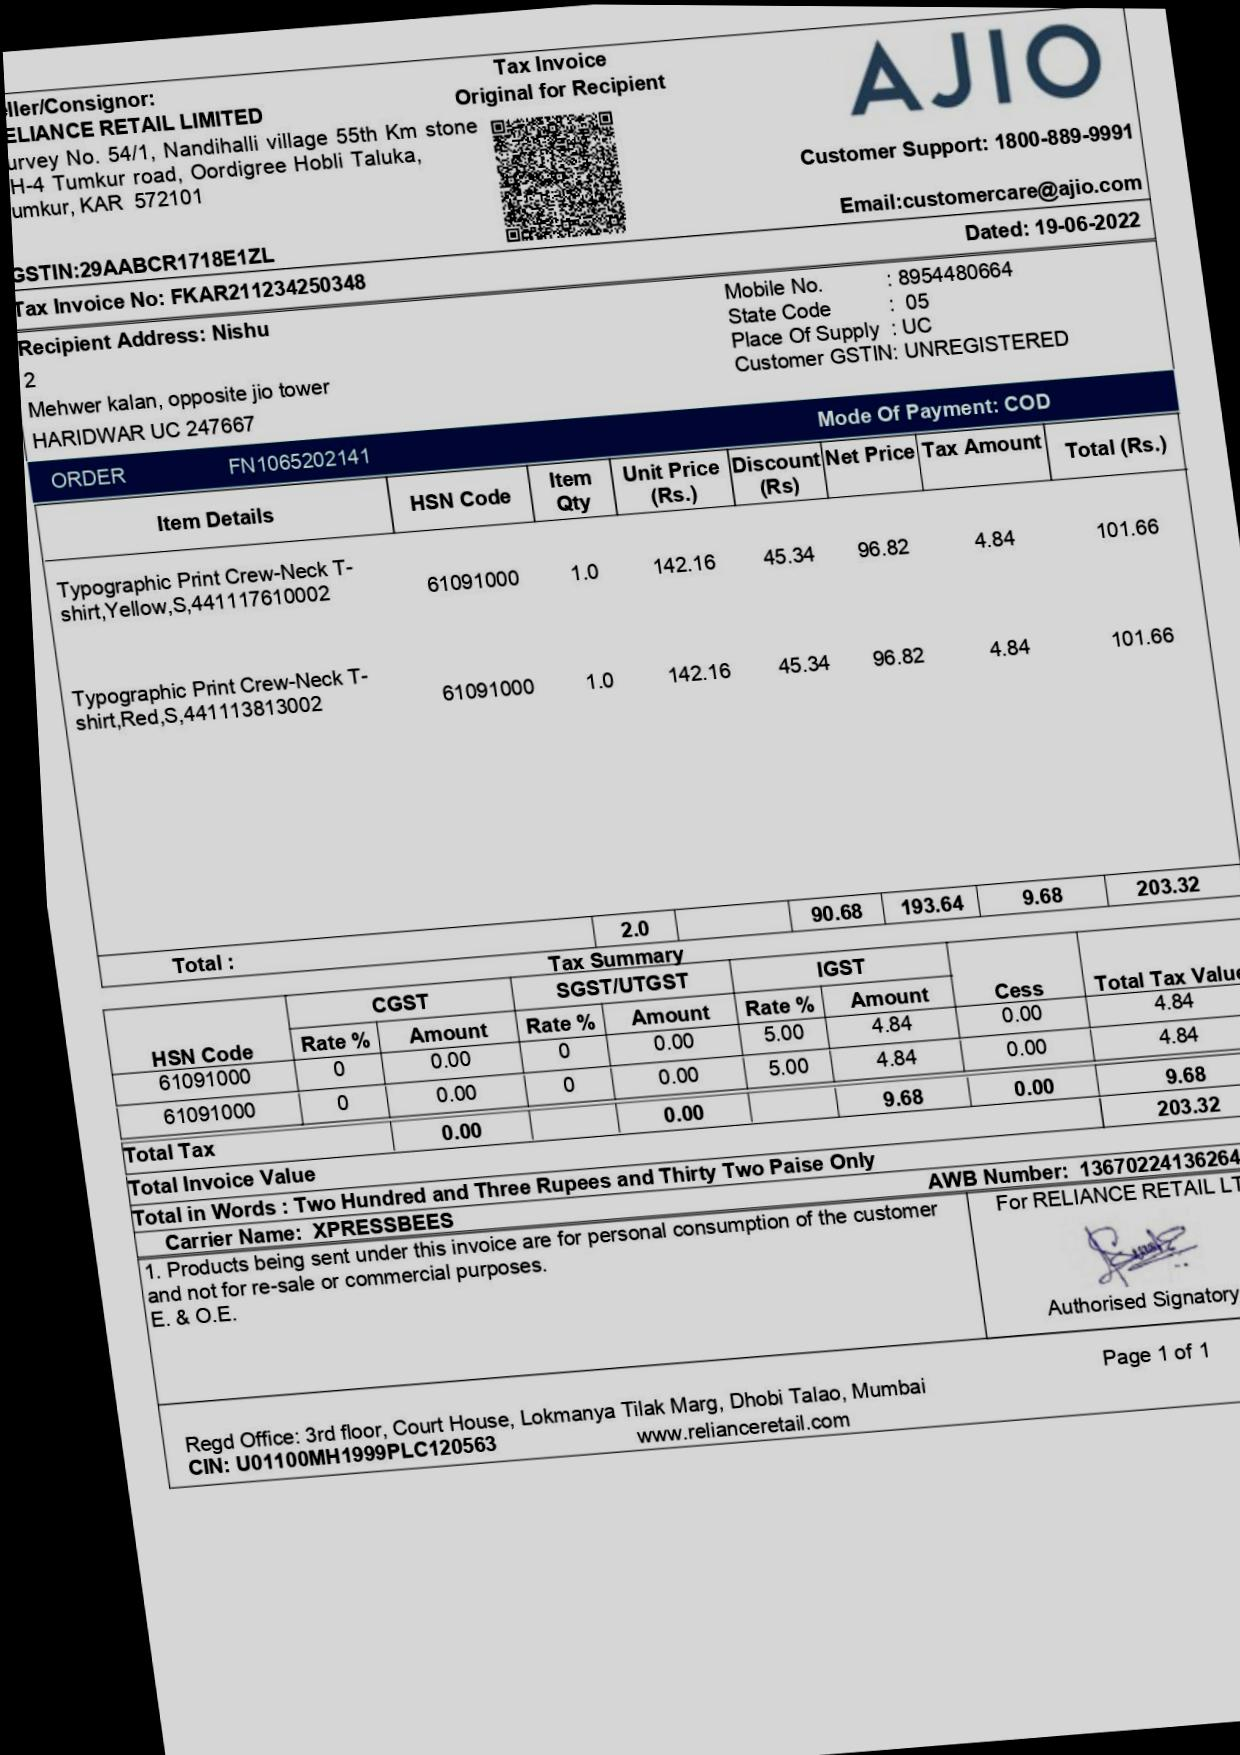

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[9.9920732e-01 1.7567597e-11]]
0
This is not a Passport


In [40]:
input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,256,256,3])

input_prediction = cnn.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('This is a Passport')
else:
  print('This is not a Passport')